*This Jupyter Notebook was created by Manuel Klein and belongs to the final project of the Data Science Bootcamp from neuefische Hamburg.*

# US Flight Delay Analysis and Prediction
## Part 2: Data Visualization

After having understood each feature of the dataset, added airport data and performed data cleaning in part one, this notebook focuses on the visualization and understanding of the dependencies of the data.

### Table of Contents

<b>[1. Initial Steps](#anchor_11)</b>
> [1.1 Adjusting Jupyter Notebook Settings](#anchor_11)<br>
> [1.2 Importing necessary libraries](#anchor_12)<br>
> [1.3 Importing the data](#anchor_13)

<b>[2. Data Preparation for Visualization](#anchor_2)</b>
> [2.1 Creating new time-based features](#anchor_21)<br>
> [2.2 Creating a dataset for delay reasons analysis](#anchor_22)<br>
> [2.3 Creating a flight route feature](#anchor_23)

<b>[3. Visualization](#anchor_31)</b>

&emsp;&ensp;[3.1 Time Perspective](#anchor_31)
> [3.1.1 Total number of flights per year](#anchor_311)<br>
> [3.1.2 Percentage of delayed flights from 2016 to 2018](#anchor_312)<br>
> [3.1.3 Distribution of delay (for the whole dataset)](#anchor_313)<br>
> [3.1.4 Total number of flights per month](#anchor_314)<br>
> [3.1.5 Delays per month of year](#anchor_315)<br>
> [3.1.6 Numbers of flights per day of week](#anchor_316)<br>
> [3.1.7 Delays per day of week](#anchor_317)<br>
> [3.1.8 Total number of departures per hour of day](#anchor_318)<br>
> [3.1.9 Departure delay per hour of day](#anchor_319)<br>

&emsp;&ensp;[3.2 Airline Perspective](#anchor_32)
> [3.2.1 Market share of US airlines (number of flights)](#anchor_32)<br>
> [3.2.2 Distribution of delayed flights per airline](#anchor_322)<br>
> [3.2.3 Percentage of delayed flights per airline](#anchor_323)<br>
> [3.2.4 Number of delayed flights per airline per year](#anchor_323)<br>

&emsp;&ensp;[3.3 Flight Route Perspective](#anchor_33)
> [3.3.1 Histogram/Distribution of flight distance (for the whole dataset)](#anchor_33)<br>
> [3.3.2 Market share: 10 most frequented airports](#anchor_332)<br>
> [3.3.3 Showing a geo-plot of all fight routes](#anchor_333)<br>
> [3.3.4 Most frequented flight routes (e.g. top 10) (Graph + Geo-Plot)](#anchor_334)<br>
> [3.3.5 Flight routes with highest delay (e.g. top 10) (Graph + Geo-Plot)](#anchor_335)<br>
> [3.3.6 Dependency of delay on flight time/distance](#anchor_336)<br>

&emsp;&ensp;[3.4 Reasons for Delay](#anchor_34)

<br><br>


<a id='anchor_11'></a>

## 1. Initial Steps

### 1.1 Adjusting Jupyter Notebook Settings

In [1]:
# Adjusting the Jupyter Notebook window width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Markdown tables left alignment and markdown table cell content left aligment:

In [3]:
%%html
<style> 
table {float:left}
table td, table th, table tr {text-align:left !important;}
</style>


<a id='anchor_12'></a>

### 1.2 Importing necessary libraries

In [53]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
import datetime
import missingno as msno
import pytz
from datetime import datetime
from pytz import timezone
#from mpl_toolkits.basemap import Basemap
import plotly as py
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [6]:
# setting pandas display options to have more columns shown in .head() etc.
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 400)


<a id='anchor_13'></a>

### 1.3 Importing the data

In [7]:
df = pd.read_pickle(r'C:\Project_Data_NF/dfendofstep5.pkl')


<a id='anchor_2'></a>

## 2. Data Preparation for Visualization 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18193815 entries, 0 to 18193814
Data columns (total 43 columns):
FL_DATE                    datetime64[ns]
FL_DAYOFWEEK               int64
AIRLINE_ID                 object
AIRLINE_NAME               object
FL_NUMBER                  int64
DEP_AIRPORT                object
ARR_AIRPORT                object
DISTANCE                   int64
DEP_TIME_PLANNED           int64
DEP_TIME                   float64
DEP_DELAY                  float64
TAXI_OUT_DURATION          float64
WHEELS_OFF_TIME            float64
WHEELS_ON_TIME             float64
IN_AIR_DURATION            float64
TAXI_IN_DURATION           float64
ARR_TIME_PLANNED           int64
ARR_TIME                   float64
ARR_DELAY                  float64
TRAVEL_DURATION_PLANNED    float64
TRAVEL_DURATION            float64
CARRIER_DELAY              float64
WEATHER_DELAY              float64
NAS_DELAY                  float64
SECURITY_DELAY             float64
LATE_AIRCRAFT_DEL

In [9]:
df.head()

,FL_DATE,FL_DAYOFWEEK,AIRLINE_ID,AIRLINE_NAME,FL_NUMBER,DEP_AIRPORT,ARR_AIRPORT,DISTANCE,DEP_TIME_PLANNED,DEP_TIME,DEP_DELAY,TAXI_OUT_DURATION,WHEELS_OFF_TIME,WHEELS_ON_TIME,IN_AIR_DURATION,TAXI_IN_DURATION,ARR_TIME_PLANNED,ARR_TIME,ARR_DELAY,TRAVEL_DURATION_PLANNED,TRAVEL_DURATION,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_AIRPORT_NAME,DEP_CITY,DEP_LAT,DEP_LONG,DEP_ALT,DEP_UTC,DEP_TZ,ARR_AIRPORT_NAME,ARR_CITY,ARR_LAT,ARR_LONG,ARR_ALT,ARR_UTC,ARR_TZ,DEP_DATETIME_PLANNED,OVERMIDNIGHT,ARR_DATETIME_PLANNED
0,2016-01-01,4,DL,Delta Air Lines,1248,DTW,LAX,1979,1935,1935.0,0.0,23.0,1958.0,2107.0,249.0,13.0,2144,2120.0,-24.0,309.0,285.0,NaN,NaN,NaN,NaN,NaN,Detroit Metropolitan Wayne County Airport,Detroit,42.212399,-83.353401,645,-5,America/New_York,Los Angeles International Airport,Los Angeles,33.942501,-118.407997,125,-8,America/Los_Angeles,2016-01-01 19:35:00,0,2016-01-01 21:44:00
1,2016-01-01,4,DL,Delta Air Lines,1706,DTW,LAX,1979,830,823.0,-7.0,24.0,847.0,1012.0,265.0,7.0,1046,1019.0,-27.0,316.0,296.0,NaN,NaN,NaN,NaN,NaN,Detroit Metropolitan Wayne County Airport,Detroit,42.212399,-83.353401,645,-5,America/New_York,Los Angeles International Airport,Los Angeles,33.942501,-118.407997,125,-8,America/Los_Angeles,2016-01-01 08:30:00,0,2016-01-01 10:46:00
2,2016-01-01,4,DL,Delta Air Lines,1719,DTW,LAX,1979,1205,1208.0,3.0,13.0,1221.0,1352.0,271.0,7.0,1416,1359.0,-17.0,311.0,291.0,NaN,NaN,NaN,NaN,NaN,Detroit Metropolitan Wayne County Airport,Detroit,42.212399,-83.353401,645,-5,America/New_York,Los Angeles International Airport,Los Angeles,33.942501,-118.407997,125,-8,America/Los_Angeles,2016-01-01 12:05:00,0,2016-01-01 14:16:00
3,2016-01-01,4,NK,"Spirit Airlines,",706,DTW,LAX,1979,1955,1955.0,0.0,37.0,2032.0,2145.0,253.0,44.0,2157,2229.0,32.0,302.0,334.0,0.0,0.0,32.0,0.0,0.0,Detroit Metropolitan Wayne County Airport,Detroit,42.212399,-83.353401,645,-5,America/New_York,Los Angeles International Airport,Los Angeles,33.942501,-118.407997,125,-8,America/Los_Angeles,2016-01-01 19:55:00,0,2016-01-01 21:57:00
4,2016-01-02,5,DL,Delta Air Lines,789,DTW,LAX,1979,2130,2128.0,-2.0,15.0,2143.0,2301.0,258.0,10.0,2340,2311.0,-29.0,310.0,283.0,NaN,NaN,NaN,NaN,NaN,Detroit Metropolitan Wayne County Airport,Detroit,42.212399,-83.353401,645,-5,America/New_York,Los Angeles International Airport,Los Angeles,33.942501,-118.407997,125,-8,America/Los_Angeles,2016-01-02 21:30:00,0,2016-01-02 23:40:00



<a id='anchor_21'></a>

### 2.1 Creating new time-based features

In [10]:
# Creating a new feature containing the departure hours
df['DEP_HOUR_PLANNED'] = df['DEP_DATETIME_PLANNED'].map(lambda x: x.strftime('%H')) # Creating a feature for the planned departure hour as int
df['DEP_HOUR_PLANNED'] = df['DEP_HOUR_PLANNED'].astype('int')

In [11]:
# Extracting year and month from timedate and saving them in separate features
df['FL_YEAR'] = df['FL_DATE'].map(lambda x: x.strftime('%Y')) # Extracting the year from the date into a separate column
df['FL_MONTH'] = df['FL_DATE'].map(lambda x: x.strftime('%m')) # Extracting the year from the date into a separate column
df['FL_MONTH'].replace({'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June', 
                         '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'November', '12': 'December'}, inplace=True)

In [12]:
# Creating a new dataframe for ressource-efficient plotting
df_delay = df[['FL_DATE', 'DISTANCE','DEP_DELAY', 'ARR_DELAY', 'AIRLINE_NAME', 'DEP_AIRPORT_NAME', 'ARR_AIRPORT_NAME','FL_DAYOFWEEK', 'FL_MONTH', 'FL_YEAR', 'DEP_HOUR_PLANNED']] # Copying the necessary features
df_delay['FL_DAYOFWEEK'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}, inplace=True)
df_delay['DEP_DELAY_0'] = np.where(df_delay['DEP_DELAY'] > 0, 1, 0) # Creating a column containing 1 for delay and 0 for no delay
df_delay['ARR_DELAY_0'] = np.where(df_delay['ARR_DELAY'] > 0, 1, 0) # Creating a column containing 1 for delay and 0 for no delay
df_delay['ARR_DELAY_15'] = np.where(df_delay['ARR_DELAY'] >= 15, 1, 0) # Creating a column containing 1 for delay and 0 for no delay

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [13]:
df_delay.head(3)

,FL_DATE,DISTANCE,DEP_DELAY,ARR_DELAY,AIRLINE_NAME,DEP_AIRPORT_NAME,ARR_AIRPORT_NAME,FL_DAYOFWEEK,FL_MONTH,FL_YEAR,DEP_HOUR_PLANNED,DEP_DELAY_0,ARR_DELAY_0,ARR_DELAY_15
0,2016-01-01,1979,0.0,-24.0,Delta Air Lines,Detroit Metropolitan Wayne County Airport,Los Angeles International Airport,Friday,January,2016,19,0,0,0
1,2016-01-01,1979,-7.0,-27.0,Delta Air Lines,Detroit Metropolitan Wayne County Airport,Los Angeles International Airport,Friday,January,2016,8,0,0,0
2,2016-01-01,1979,3.0,-17.0,Delta Air Lines,Detroit Metropolitan Wayne County Airport,Los Angeles International Airport,Friday,January,2016,12,1,0,0



<a id='anchor_22'></a>

### 2.2 Creating a dataset for delay reasons analysis

In [14]:
df_delay_reasons = df[['DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]

In [15]:
# Check if there are no delay reasons if the flight arrived on time --> OK!
df_delay_reasons[df_delay_reasons['ARR_DELAY'] <= 0].isna().sum() / len(df_delay_reasons[df_delay_reasons['ARR_DELAY'] <= 0])

DEP_DELAY              0.0
ARR_DELAY              0.0
CARRIER_DELAY          1.0
WEATHER_DELAY          1.0
NAS_DELAY              1.0
SECURITY_DELAY         1.0
LATE_AIRCRAFT_DELAY    1.0
dtype: float64

In [16]:
# For around 50% of the delayed flights, delay reason columns are filled
df_delay_reasons[df_delay_reasons['ARR_DELAY'] > 0].isna().sum() / len(df_delay_reasons[df_delay_reasons['ARR_DELAY'] > 0])

DEP_DELAY              0.000000
ARR_DELAY              0.000000
CARRIER_DELAY          0.472616
WEATHER_DELAY          0.472616
NAS_DELAY              0.472616
SECURITY_DELAY         0.472616
LATE_AIRCRAFT_DELAY    0.472616
dtype: float64

In [17]:
# Dropping all NaN rows of the delay dataset
df_delay_reasons = df_delay_reasons.dropna()

In [18]:
df_delay_reasons.head(100)

,DEP_DELAY,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
3,0.0,32.0,0.0,0.0,32.0,0.0,0.0
6,24.0,26.0,0.0,24.0,2.0,0.0,0.0
11,-2.0,23.0,0.0,0.0,23.0,0.0,0.0
12,1.0,22.0,0.0,0.0,22.0,0.0,0.0
14,7.0,50.0,7.0,0.0,43.0,0.0,0.0
15,26.0,63.0,2.0,0.0,37.0,0.0,24.0
16,5.0,16.0,5.0,0.0,11.0,0.0,0.0
22,35.0,30.0,30.0,0.0,0.0,0.0,0.0
28,62.0,47.0,10.0,0.0,1.0,0.0,36.0
30,-1.0,20.0,0.0,0.0,20.0,0.0,0.0



<a id='anchor_23'></a>

### 2.3 Creating a flight route feature

In [ ]:
df['FLIGHTROUTE_BASE'] = df['DEP_AIRPORT'] + df['ARR_AIRPORT']

In [ ]:
(df['FLIGHTROUTE_BASE'].unique()).shape

In [ ]:
flightroutes = list(df['FLIGHTROUTE_BASE'].unique())

In [ ]:
len(flightroutes)

In [ ]:
flightroutes_bothdirections = []
for i in flightroutes:
    if i not in flightroutes_bothdirections:
        if (i[3:6] + i[0:3]) not in flightroutes_bothdirections:
            flightroutes_bothdirections.append(i)

In [ ]:
len(flightroutes_bothdirections)

In [ ]:
def routeadjustment(x):
    if x not in flightroutes_bothdirections:
        return (x[3:6] + x[0:3])
    else:
        return x

In [ ]:
df['FLIGHTROUTE'] = df['FLIGHTROUTE_BASE'].apply(routeadjustment)

In [ ]:
df['FLIGHTROUTE'].unique().shape

In [ ]:
df['FLIGHTROUTE_DEP'] = df['FLIGHTROUTE']
df['FLIGHTROUTE_ARR'] = df['FLIGHTROUTE']

In [ ]:
def firstthreechar(x):
    return x[0:3]

def lastthreechar(x):
    return x[3:6]

In [ ]:
df['FLIGHTROUTE_DEP'] = df['FLIGHTROUTE_DEP'].apply(firstthreechar)
df['FLIGHTROUTE_ARR'] = df['FLIGHTROUTE_ARR'].apply(lastthreechar)

In [ ]:
df.drop(columns=['FLIGHTROUTE_BASE'], inplace=True)

In [ ]:
df.head()

Info Slide in presentation:

* Source of the dataset
* Number of observations:
* Number of airlines:
* Number of airports:


<a id='anchor_31'></a>

## 3. Data Visualization

### 3.1 Time Perspective


<a id='anchor_311'></a>

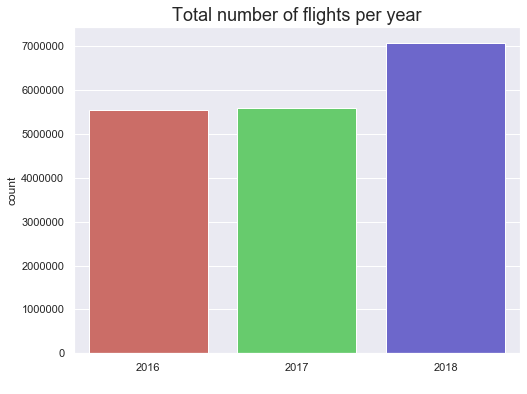

In [22]:
# 3.1.1 Plotting the total number of flights per year
plt.figure(figsize = (8,6))
plt.title('Total number of flights per year', fontsize=18)
sns.countplot(x=df['FL_YEAR'], palette="hls")
plt.xlabel(' ', fontsize=12);
rc={'axes.labelsize': 14, 'axes.titlesize': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14}
plt.rcParams.update(**rc)


<a id='anchor_312'></a>

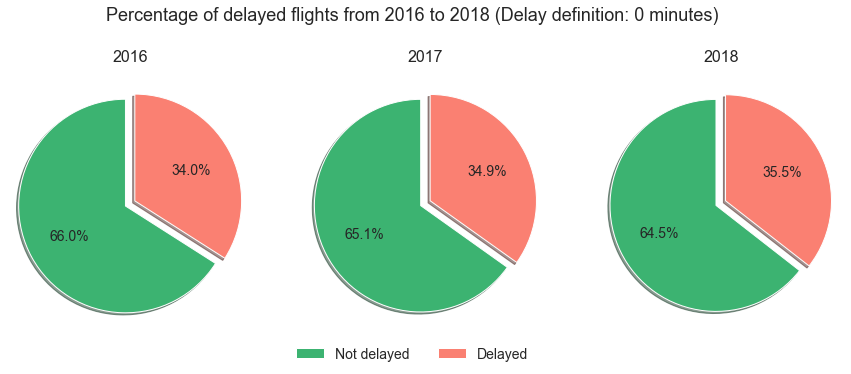

In [23]:
# 3.1.2a Pie charts (Delay definition: 0 minutes)
labels = ['Not delayed', 'Delayed']
sizes2016 = df_delay[df_delay['FL_YEAR'] == '2016']['ARR_DELAY_0'].value_counts().values
sizes2017 = df_delay[df_delay['FL_YEAR'] == '2017']['ARR_DELAY_0'].value_counts().values
sizes2018 = df_delay[df_delay['FL_YEAR'] == '2018']['ARR_DELAY_0'].value_counts().values

fig1, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.pie(sizes2016, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0, 0.1), colors=['mediumseagreen', 'salmon'], textprops={'fontsize': 14})
ax1.axis('equal')
ax1.set_title('2016', fontsize=16)

ax2.pie(sizes2017, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0, 0.1), colors=['mediumseagreen', 'salmon'], textprops={'fontsize': 14})
ax2.axis('equal')
ax2.set_title('2017', fontsize=16)
ax2.legend(labels=labels, loc='lower left', bbox_to_anchor= (-0.05, -0.1), ncol=2, 
            borderaxespad=0, frameon=False, fontsize=14)

ax3.pie(sizes2018, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0, 0.1), colors=['mediumseagreen', 'salmon'], textprops={'fontsize': 14})
ax3.axis('equal')
ax3.set_title('2018', fontsize=16)


fig1.set_figheight(5)
fig1.set_figwidth(15)
fig1.suptitle('Percentage of delayed flights from 2016 to 2018 (Delay definition: 0 minutes)', fontsize=18, y=1.05)
plt.show()

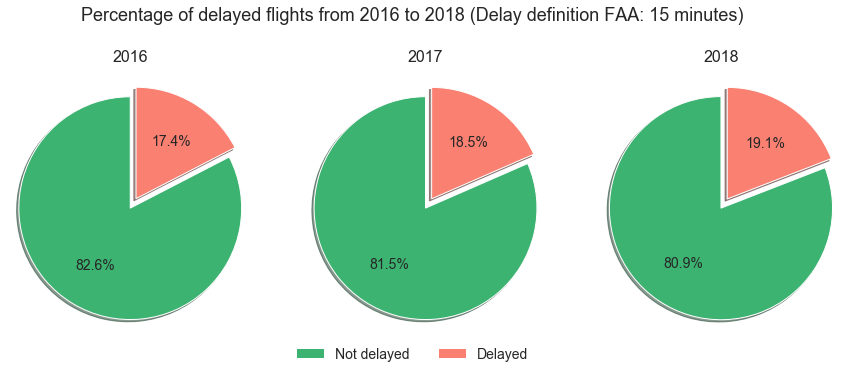

In [24]:
# 3.1.2b Pie charts (Delay definition: 15 minutes according to FAA)
labels = ['Not delayed', 'Delayed']
sizes2016 = df_delay[df_delay['FL_YEAR'] == '2016']['ARR_DELAY_15'].value_counts().values
sizes2017 = df_delay[df_delay['FL_YEAR'] == '2017']['ARR_DELAY_15'].value_counts().values
sizes2018 = df_delay[df_delay['FL_YEAR'] == '2018']['ARR_DELAY_15'].value_counts().values

fig1, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.pie(sizes2016, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0, 0.1), colors=['mediumseagreen', 'salmon'], textprops={'fontsize': 14})
ax1.axis('equal')
ax1.set_title('2016', fontsize=16)

ax2.pie(sizes2017, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0, 0.1), colors=['mediumseagreen', 'salmon'], textprops={'fontsize': 14})
ax2.axis('equal')
ax2.set_title('2017', fontsize=16)
ax2.legend(labels=labels, loc='lower left', bbox_to_anchor= (-0.05, -0.1), ncol=2, 
            borderaxespad=0, frameon=False, fontsize=14)

ax3.pie(sizes2018, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0, 0.1), colors=['mediumseagreen', 'salmon'], textprops={'fontsize': 14})
ax3.axis('equal')
ax3.set_title('2018', fontsize=16)


fig1.set_figheight(5)
fig1.set_figwidth(15)
fig1.suptitle('Percentage of delayed flights from 2016 to 2018 (Delay definition FAA: 15 minutes)', fontsize=18, y=1.05)
plt.show()


<a id='anchor_313'></a>

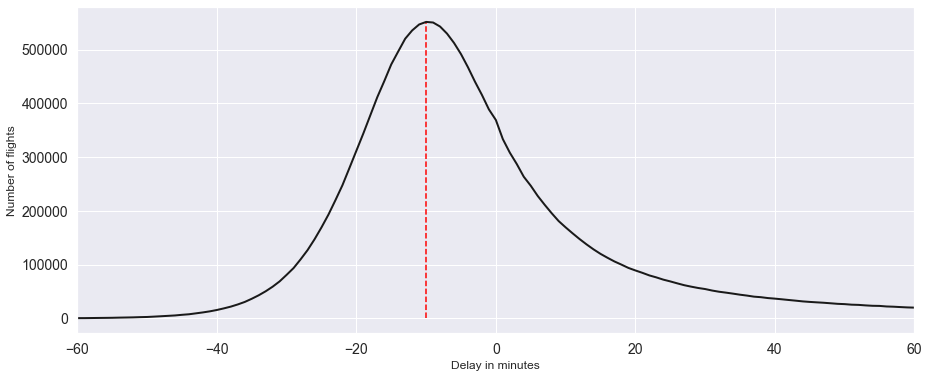

In [25]:
# 3.1.3 Plotting the delay distribution
plt.figure(figsize = (15,6))
plt.xlim(-60, 60)
plt.xlabel('Delay in minutes', fontsize=12)
plt.ylabel('Number of flights', fontsize=12)
plt.vlines(x=-10, ymin=0, ymax=df['ARR_DELAY'].value_counts().max(), color='red', linestyles='dashed', zorder=2)
plt.plot(df['ARR_DELAY'].value_counts().sort_index().index, df['ARR_DELAY'].value_counts().sort_index().values, 'k', linewidth=2);


<a id='anchor_314'></a>

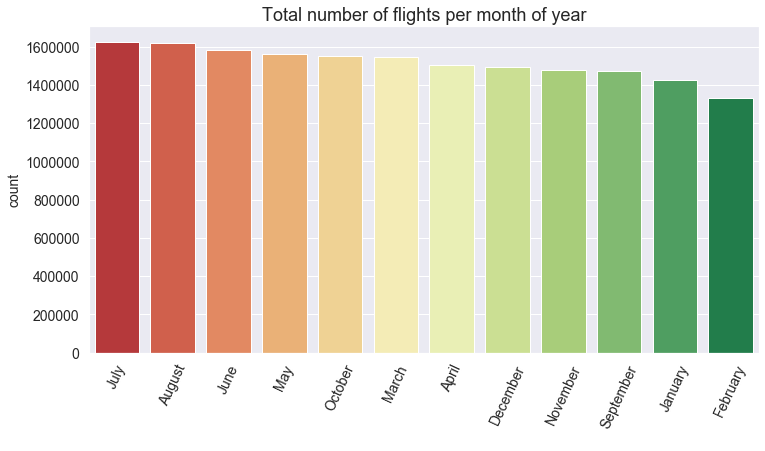

In [26]:
# 3.1.4 Plotting the number of flights per month of year
plt.figure(figsize = (12,6))
plt.title('Total number of flights per month of year', fontsize=18)
sns.countplot(x=df_delay['FL_MONTH'], palette="RdYlGn", order=df_delay['FL_MONTH'].value_counts().index)
plt.xticks(rotation=65)
plt.xlabel(' ', fontsize=12);
rc={'axes.labelsize': 14, 'axes.titlesize': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14}
plt.rcParams.update(**rc)


<a id='anchor_315'></a>

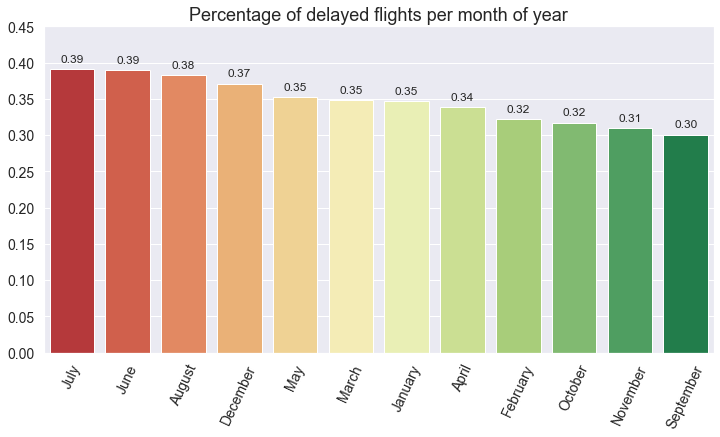

In [27]:
# 3.1.5 Plotting the percentage of delayed flights per month of year
plt.figure(figsize = (12,6))
zaehler = df_delay[df_delay['ARR_DELAY_0'] == 1]['FL_MONTH'].value_counts()
nenner = df_delay[df_delay['ARR_DELAY_0'] == 0]['FL_MONTH'].value_counts()
cat = (zaehler/(zaehler+nenner)).sort_values(ascending=False)
splot=sns.barplot(x=cat.index, y=cat.values, palette='RdYlGn')
plt.xticks(rotation=65)
plt.ylim(0.0, 0.45)
plt.title('Percentage of delayed flights per month of year', fontsize=18)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=12)


<a id='anchor_316'></a>

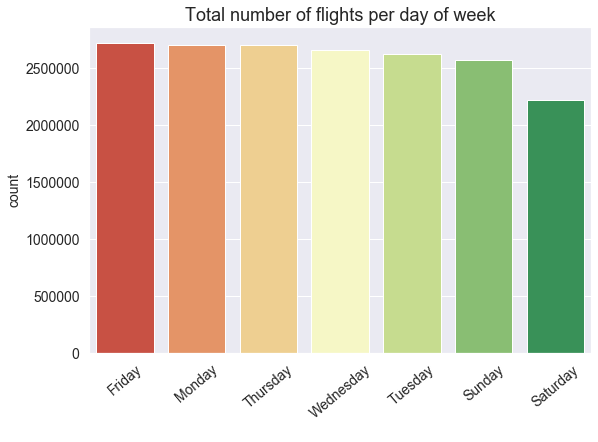

In [28]:
# 3.1.6 Plotting the number of flights per day of week
plt.figure(figsize = (9,6))
plt.title('Total number of flights per day of week', fontsize=18)
sns.countplot(x=df_delay['FL_DAYOFWEEK'], palette="RdYlGn", order=df_delay['FL_DAYOFWEEK'].value_counts().index)
plt.xticks(rotation=40)
plt.xlabel(' ', fontsize=12);
rc={'axes.labelsize': 14, 'axes.titlesize': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14}
plt.rcParams.update(**rc)


<a id='anchor_317'></a>

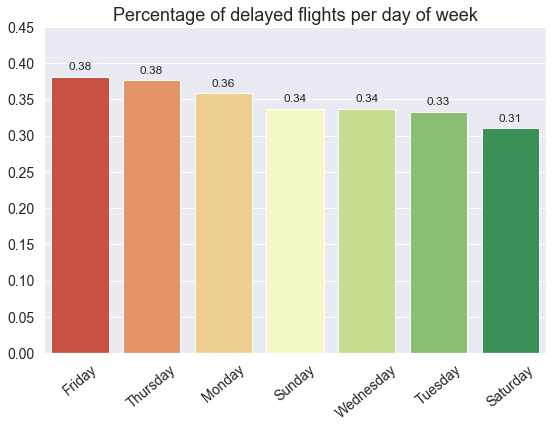

In [29]:
# 3.1.7 Plotting the percentage of delayed flights per day of week
plt.figure(figsize = (9,6))
zaehler = df_delay[df_delay['ARR_DELAY_0'] == 1]['FL_DAYOFWEEK'].value_counts()
nenner = df_delay[df_delay['ARR_DELAY_0'] == 0]['FL_DAYOFWEEK'].value_counts()
cat = (zaehler/(zaehler+nenner)).sort_values(ascending=False)
splot=sns.barplot(x=cat.index, y=cat.values, palette='RdYlGn')
plt.xticks(rotation=40)
plt.ylim(0.0, 0.45)
plt.title('Percentage of delayed flights per day of week', fontsize=18)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=12)


<a id='anchor_318'></a>

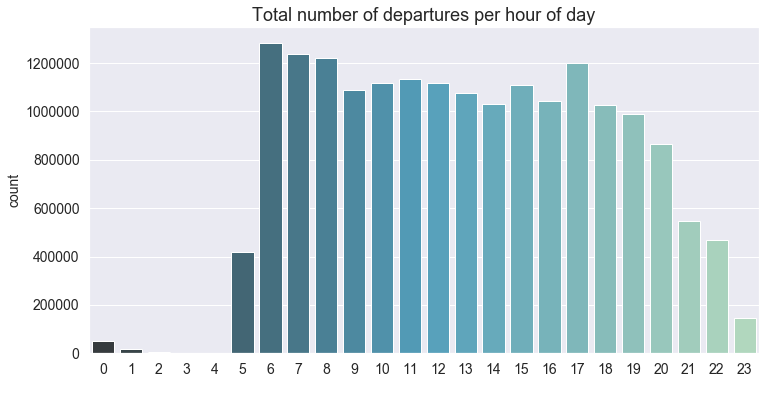

In [30]:
# 3.1.8 Plotting the total number of flights per hour of day
plt.figure(figsize = (12,6))
plt.title('Total number of departures per hour of day', fontsize=18)
sns.countplot(x=df_delay['DEP_HOUR_PLANNED'], palette="GnBu_d")
plt.xlabel(' ', fontsize=12);
rc={'axes.labelsize': 14, 'axes.titlesize': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14}
plt.rcParams.update(**rc)


<a id='anchor_319'></a>

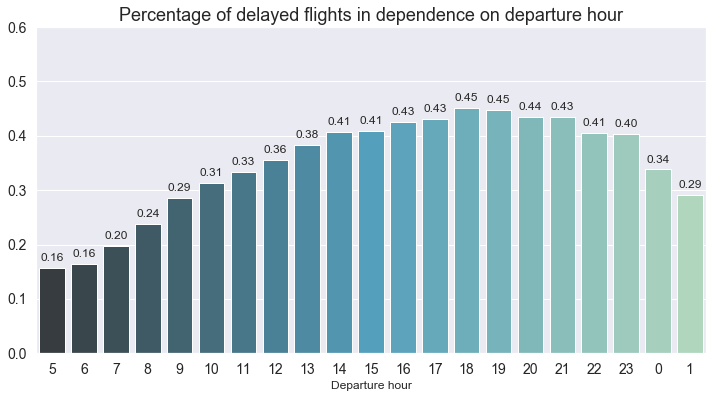

In [31]:
# 3.1.9 Plotting the percentage of delayed flights per hour of day
plt.figure(figsize = (12,6))
zaehler = df_delay[df_delay['DEP_DELAY_0'] == 1]['DEP_HOUR_PLANNED'].value_counts()
nenner = df_delay[df_delay['DEP_DELAY_0'] == 0]['DEP_HOUR_PLANNED'].value_counts()
cat = (zaehler/(zaehler+nenner)).sort_values(ascending=False)
splot=sns.barplot(x=cat.index, y=cat.values, palette='GnBu_d', order=[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1])
plt.ylim(0.0, 0.6)
plt.xlabel('Departure hour', fontsize=12)
plt.title('Percentage of delayed flights in dependence on departure hour', fontsize=18)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=12)


<a id='anchor_32'></a>

### 3.2 Airline Perspective


<a id='anchor_221'></a>

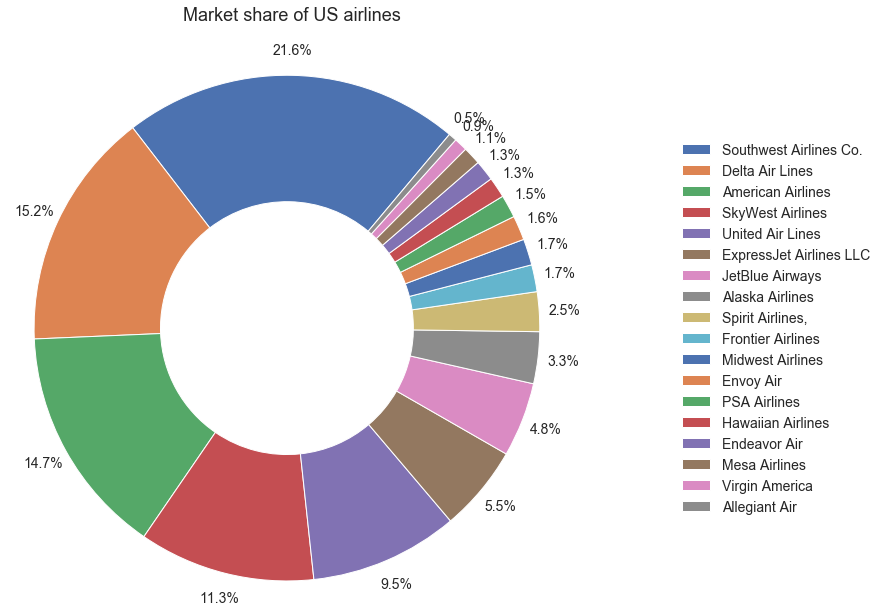

In [32]:
# 3.2.1 Market Share of US airlines
airlines = df['AIRLINE_NAME'].value_counts().values
labels = df['AIRLINE_NAME'].value_counts().index

fig1, (ax1) = plt.subplots(1, 1)

ax1.pie(airlines, wedgeprops=dict(width=0.5), autopct='%1.1f%%', pctdistance=1.1, shadow=False, startangle=50, textprops={'fontsize': 14})
ax1.axis('equal')
#ax1.set_title('Market share of US airlines', fontsize=18)
ax1.legend(labels=labels, loc='center left', bbox_to_anchor= (1.2, 0, 0.5, 1), ncol=1, 
            borderaxespad=0, frameon=False, fontsize=14)

fig1.suptitle('Market share of US airlines', fontsize=18, x=0.52, y=0.95)
fig1.set_figheight(10)
fig1.set_figwidth(10)
plt.show()


<a id='anchor_222'></a>


<a id='anchor_322'></a>

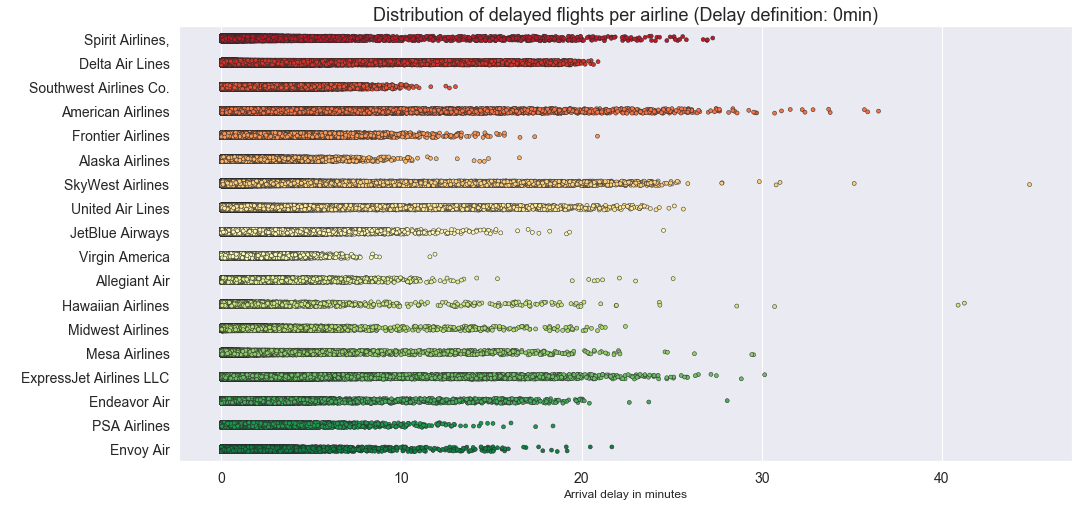

In [52]:
# 3.2.2 Plotting the distribution of delayed flights per airline (Delay definition: 0 minutes)
plt.figure(figsize = (16,8))
X = (df_delay[df_delay['ARR_DELAY_0'] == 1]['ARR_DELAY'] / 60)
Y = df_delay[df_delay['ARR_DELAY_0'] == 1]['AIRLINE_NAME']
sns.stripplot(y=Y, x=X, size = 4, palette = 'RdYlGn', linewidth = 0.5,  jitter=True)
plt.xlabel('Arrival delay in hours', fontsize=12)
plt.ylabel(' ', fontsize=12);
plt.title('Distribution of delayed flights per airline (Delay definition: 0min)', fontsize=18);


<a id='anchor_323'></a>

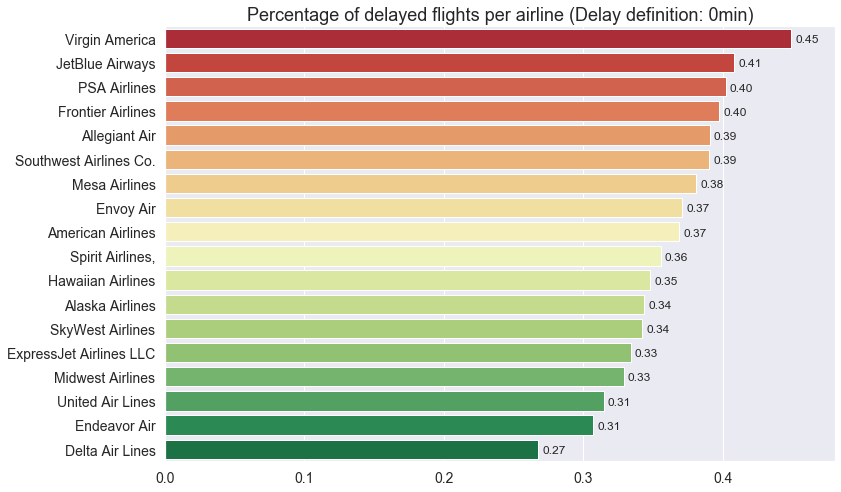

In [34]:
# 3.2.3a Plotting the percentage of delayed flights per airline (Delay definition: 0 minutes)
plt.figure(figsize = (12,8))
zaehler = df_delay[df_delay['ARR_DELAY_0'] == 1]['AIRLINE_NAME'].value_counts()
nenner = df_delay[df_delay['ARR_DELAY_0'] == 0]['AIRLINE_NAME'].value_counts()
cat = (zaehler/(zaehler+nenner)).sort_values(ascending=False)
splot=sns.barplot(y=cat.index, x=cat.values, palette='RdYlGn', orient='h')
plt.xlim(0.0, 0.48)
plt.title('Percentage of delayed flights per airline (Delay definition: 0min)', fontsize=18)
for p in splot.patches:
    width = p.get_width()
    plt.text(0.003 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center', fontsize=12)

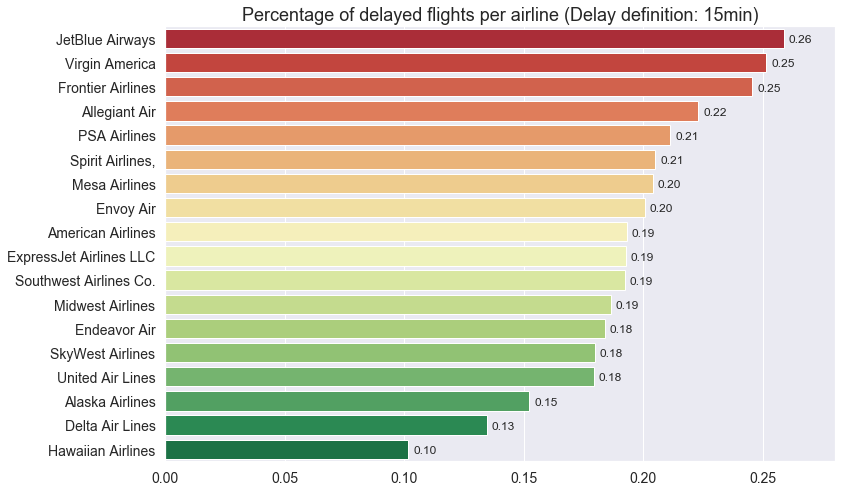

In [37]:
# 3.2.3b Plotting the percentage of delayed flights per airline (Delay definition: 15 minutes according to FAA)
plt.figure(figsize = (12,8))
zaehler = df_delay[df_delay['ARR_DELAY_15'] == 1]['AIRLINE_NAME'].value_counts()
nenner = df_delay[df_delay['ARR_DELAY_15'] == 0]['AIRLINE_NAME'].value_counts()
cat = (zaehler/(zaehler+nenner)).sort_values(ascending=False)
splot=sns.barplot(y=cat.index, x=cat.values, palette='RdYlGn', orient='h')
#plt.xticks(rotation=70)
plt.xlim(0.0, 0.28)
plt.title('Percentage of delayed flights per airline (Delay definition: 15min)', fontsize=18)
for p in splot.patches:
    width = p.get_width()
    plt.text(0.002 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center', fontsize=12)


<a id='anchor_324'></a>

Text(0, 0.5, ' ')

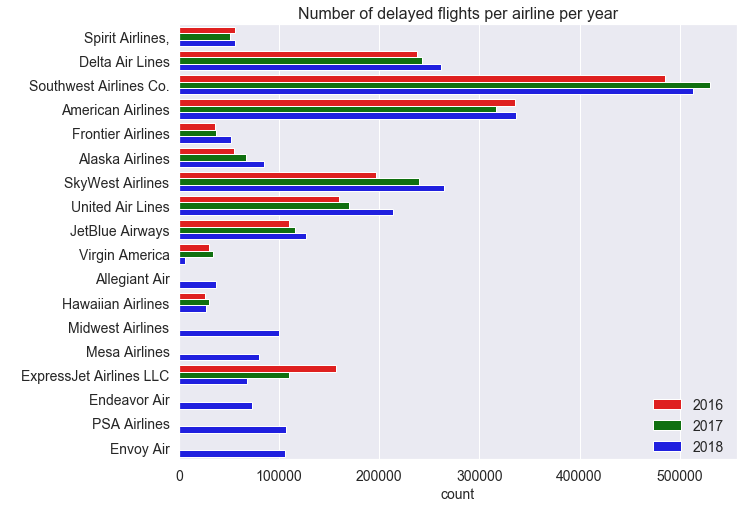

In [38]:
# 3.2.4 Plotting the number of delayed flights per airline per year
plt.figure(figsize = (10,8))
plt.title('Number of delayed flights per airline per year', fontsize=16)
sns.countplot(y=df_delay[df_delay['ARR_DELAY_0'] == 1]['AIRLINE_NAME'], hue=df_delay[df_delay['ARR_DELAY_0'] == 1]['FL_YEAR'], palette = ['red', 'green', 'blue'], orient='h')
plt.legend(loc='lower left', bbox_to_anchor= (0.84, 0, 0.5, 1), ncol=1, borderaxespad=0, frameon=False, fontsize=14)
#plt.xticks(rotation=70)
plt.ylabel(' ', fontsize=12)

In [ ]:
# To do: Plotting the percentage of delayed flights per airline per year, deleting graph 3.2.4

In [40]:
airline_list = list(df_delay['AIRLINE_NAME'].unique())

In [41]:
airline_list

['Delta Air Lines',
 'Spirit Airlines,',
 'Frontier Airlines',
 'Southwest Airlines Co.',
 'American Airlines',
 'Alaska Airlines',
 'SkyWest Airlines',
 'United Air Lines',
 'JetBlue Airways',
 'Virgin America',
 'Allegiant Air',
 'Hawaiian Airlines',
 'Midwest Airlines',
 'Mesa Airlines',
 'ExpressJet Airlines LLC',
 'Endeavor Air',
 'PSA Airlines',
 'Envoy Air']


<a id='anchor_33'></a>

### 3.3 Airport and Flight Route Perspective

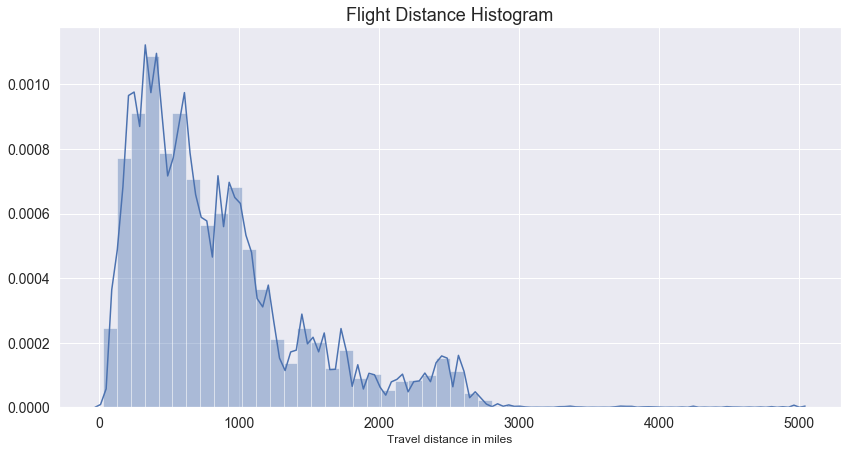

In [45]:
# 3.3.1 Histogram of the travel time
plt.figure(figsize = (14,7))
#plt.xlim(-50, 3200)
plt.title('Flight Distance Histogram', fontsize=18)
ax = sns.distplot(df['DISTANCE'])
plt.xlabel('Travel distance in miles', fontsize=12);

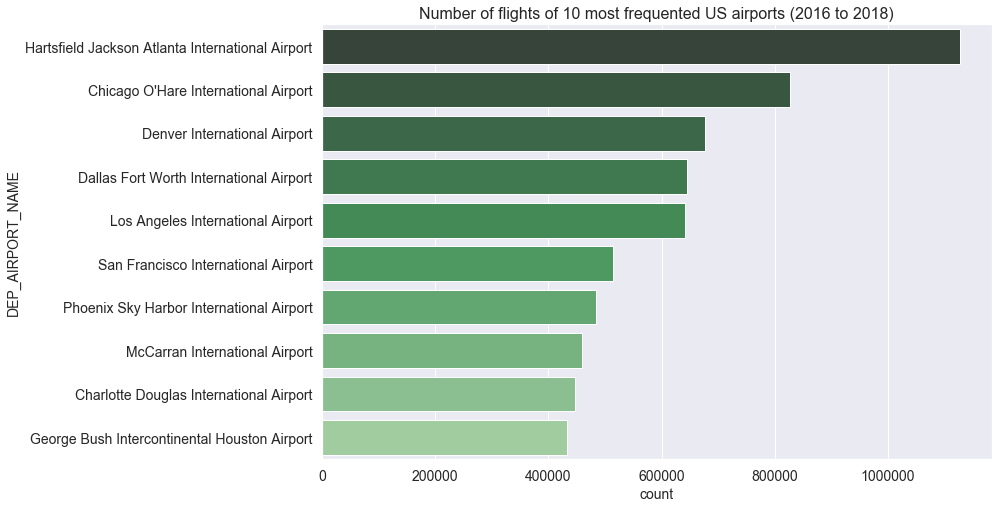

In [46]:
# Plotting the absolute market share of the 10 most frequented US airports (2016 to 2018)
plt.figure(figsize = (12,8))
#splot=sns.barplot(y=cat.index, x=cat.values, palette='Greens_d', orient='h')
splot=sns.countplot(y=df['DEP_AIRPORT_NAME'], palette="Greens_d", orient='h', order=df['DEP_AIRPORT_NAME'].value_counts().iloc[:10].index)
#plt.xticks(rotation=50)
#plt.xlim(0.0, 6.5)
#plt.xlabel('Percentage', fontsize=12)
plt.title('Number of flights of 10 most frequented US airports (2016 to 2018)', fontsize=16);

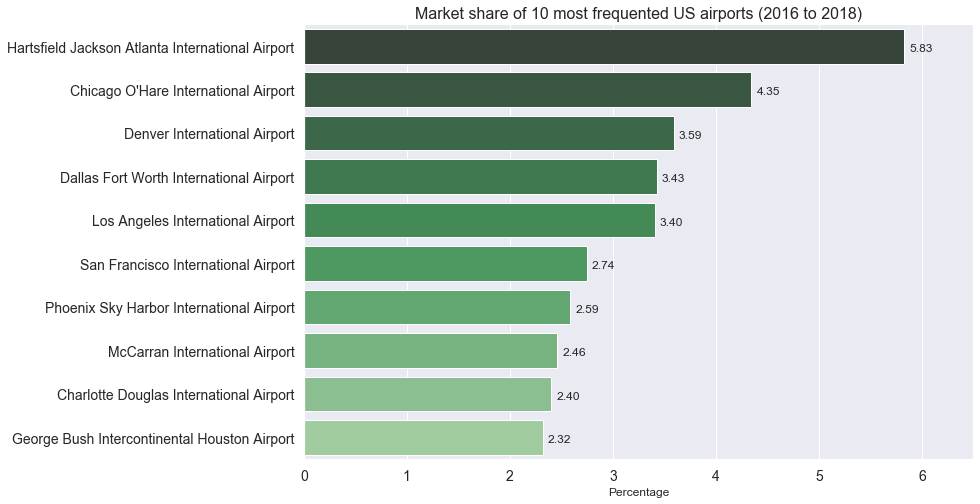

In [47]:
# Plotting the relative market share of the 10 biggest US airports
plt.figure(figsize = (12,8))
zaehler = df['DEP_AIRPORT_NAME'].value_counts().iloc[:10]
nenner = len(df)
cat = (zaehler/(zaehler+nenner)*100).sort_values(ascending=False)
splot=sns.barplot(y=cat.index, x=cat.values, palette='Greens_d', orient='h')
plt.xlim(0.0, 6.5)
plt.xlabel('Percentage', fontsize=12)
plt.title('Market share of 10 most frequented US airports (2016 to 2018)', fontsize=16)
for p in splot.patches:
    width = p.get_width()
    plt.text(0.05 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center', fontsize=12)

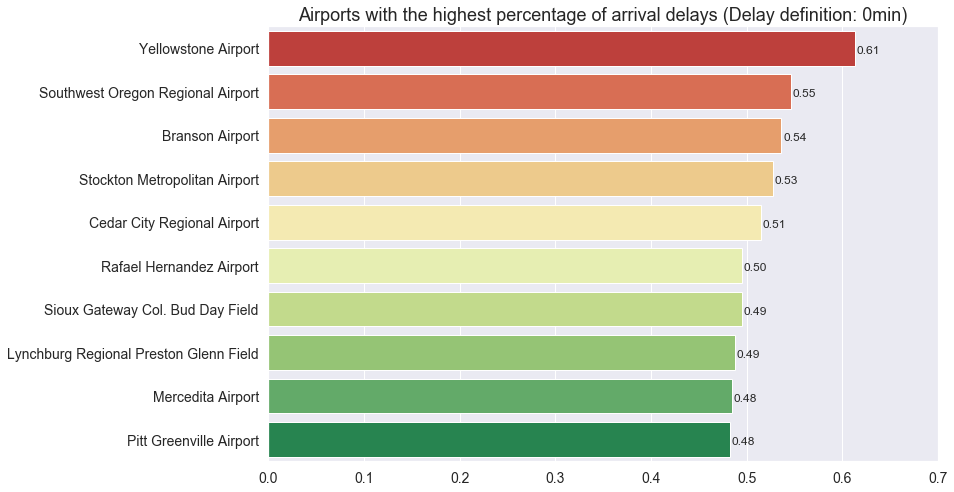

In [48]:
# 3.2.2 Plotting the 10 airports with the highest percentage of arrival delays
plt.figure(figsize = (12,8))
zaehler = df_delay[df_delay['ARR_DELAY_0'] == 1]['ARR_AIRPORT_NAME'].value_counts()
nenner = df_delay[df_delay['ARR_DELAY_0'] == 0]['ARR_AIRPORT_NAME'].value_counts()
cat = (zaehler/(zaehler+nenner)).sort_values(ascending=False)
splot=sns.barplot(y=cat.index[:10], x=cat.values[:10], palette='RdYlGn', orient='h')
#plt.xticks(rotation=70)
plt.xlim(0.0, 0.7)
plt.title('Airports with the highest percentage of arrival delays (Delay definition: 0min)', fontsize=18)
for p in splot.patches:
    width = p.get_width()
    plt.text(0.002 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center', fontsize=12)

[]

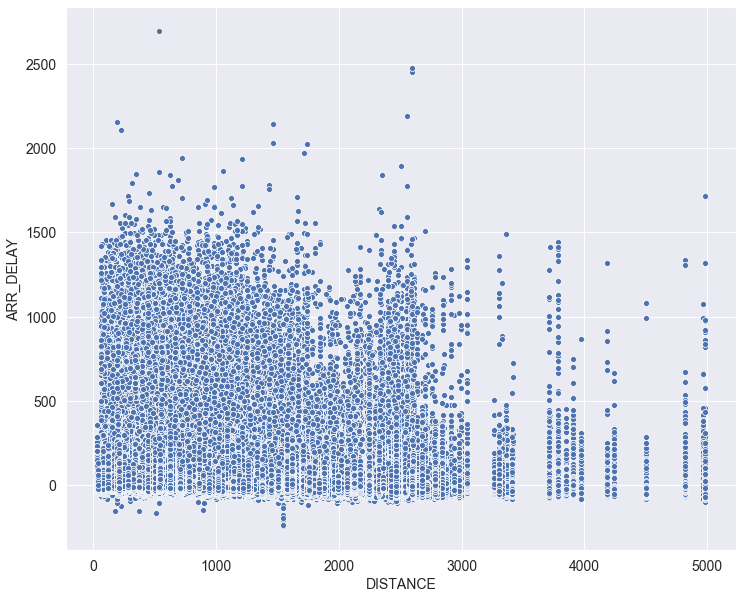

In [49]:
# 3.2.2 Plotting the 10 airports with the highest percentage of arrival delays
plt.figure(figsize = (12,10))
sns.scatterplot(x='DISTANCE', y='ARR_DELAY',  data=df_delay)
plt.plot()


<a id='anchor_34'></a>

### 3.4 Reasons for Delay

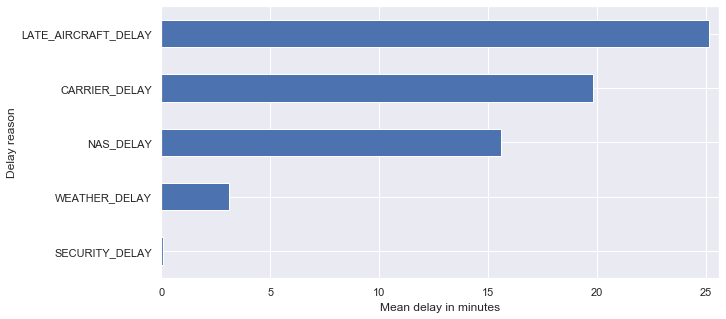

In [82]:
df_delay_reasons_only = df_delay_reasons.copy()
df_delay_reasons_only.drop(columns=['DEP_DELAY', 'ARR_DELAY'], inplace=True)
sns.set()
plt.figure(figsize = (10, 5))
fig = df_delay_reasons_only.mean().sort_values(ascending=True).plot(kind='barh')
plt.margins(0.02)
plt.ylabel('Delay reason')
plt.xlabel('Mean delay in minutes')
plt.show()

In [126]:
df_delay_reasons[df_delay_reasons['SECURITY_DELAY'] > 0]['SECURITY_DELAY']

6311         7.0
7892        54.0
9478         6.0
12011       20.0
12497       14.0
            ... 
18187617    23.0
18189356    28.0
18189576    25.0
18192246    23.0
18192251    10.0
Name: SECURITY_DELAY, Length: 10798, dtype: float64

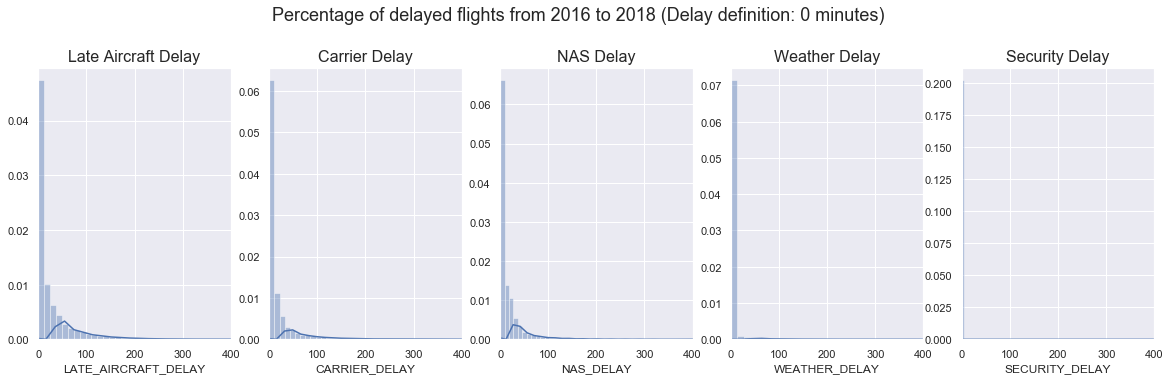

In [133]:
# 3.3.1 Histogram of the travel time

fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)

sns.distplot(df_delay_reasons['LATE_AIRCRAFT_DELAY'], ax=ax1, bins=200)
ax1.set_title('Late Aircraft Delay', fontsize=16)
ax1.set_xlim([0, 400])

sns.distplot(df_delay_reasons['CARRIER_DELAY'], ax=ax2, bins=200)
ax2.set_title('Carrier Delay', fontsize=16)
ax2.set_xlim([0, 400])

sns.distplot(df_delay_reasons['NAS_DELAY'], ax=ax3, bins=200)
ax3.set_title('NAS Delay', fontsize=16)
ax3.set_xlim([0, 400])

sns.distplot(df_delay_reasons['WEATHER_DELAY'], ax=ax4, bins=200)
ax4.set_title('Weather Delay', fontsize=16)
ax4.set_xlim([0, 400])

sns.distplot(df_delay_reasons['SECURITY_DELAY'], ax=ax5, bins=200)
ax5.set_title('Security Delay', fontsize=16)
ax5.set_xlim([0, 400])

fig1.set_figheight(5)
fig1.set_figwidth(20)
fig1.suptitle('Percentage of delayed flights from 2016 to 2018 (Delay definition: 0 minutes)', fontsize=18, y=1.05)
plt.show()

In [ ]:
plt.figure(figsize = (5,7))
plt.xlim(-10, 400)
plt.title('Flight Distance Histogram', fontsize=18)
ax1 = sns.distplot(df_delay_reasons['LATE_AIRCRAFT_DELAY'])
plt.xlabel('Delay in minutes', fontsize=12);



In [ ]:

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0,0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0,1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1,0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1,1]')

## Future Work

* Data Cleaning: Spending more time on identifying and removing data inconsistencies (re-calculation instead of dropping rows)
* Deeper delay understanding by adding further information: 
 * Which aircraft types are used on flight routes with highest delay?
 * Airport capacity per day / per hour
 * Air traffic capacity for specific regions

## No longer needed

In [ ]:
df_delayed = df_delay[df_delay['ARR_DELAY'] == 1]

In [ ]:
testing = df_delay.groupby("FL_YEAR").sum()

In [ ]:
testing.index.get_loc[1884785]

In [ ]:
testing[testing.index == 2016].ARR_DELAY.apply(lambda x: x / len(df_delay[df_delay["FL_YEAR"] == 2016]))

In [ ]:
pd.DatetimeIndex(df_delay['FL_DATE']).year

In [ ]:
df['DEP_AIRPORT_NAME'].value_counts().sort_values(ascending=False)

In [ ]:
# # Plotting the market share of the 10 biggest US airports
plt.figure(figsize = (17,6))
zaehler = df['DEP_AIRPORT_NAME'].value_counts().iloc[:10]
nenner = len(df)
cat = (zaehler/(zaehler+nenner)*100).sort_values(ascending=False)
splot=sns.barplot(x=cat.index, y=cat.values, palette='Greens_d')
plt.xticks(rotation=50)
plt.ylim(0.0, 7)
plt.ylabel('Percentage', fontsize=12)
plt.title('Market share of 10 biggest US airports', fontsize=16)
for p in splot.patches:
    splot.annotate((str(format(p.get_height(), '.1f'))+ "%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# Plotting the duration to success/failed ratio
plt.figure(figsize = (17,6))
plt.title('Most important US Airlines', fontsize=16)
splot = sns.countplot(x=df['AIRLINE_NAME'], palette="Blues_d", order=df['AIRLINE_NAME'].value_counts().iloc[:10].index)
plt.xticks(rotation=70)
plt.xlabel('Airline Name', fontsize=12)
for p in splot.patches:
    splot.annotbate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# Plotting the percentage of successful projects per country
plt.figure(figsize = (17,6))
zaehler = df['AIRLINE_NAME'].value_counts().iloc[:10]
nenner = len(df)
cat = (zaehler/(zaehler+nenner)).sort_values(ascending=False)
splot=sns.barplot(x=cat.index, y=cat.values, palette='Blues_d')
plt.xticks(rotation=50)
plt.ylim(0.0, 0.2)
plt.title('Market share of 10 biggest US airlines', fontsize=16)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# Plotting the duration to success/failed ratio
plt.figure(figsize = (17,6))
plt.title('Most important US airports', fontsize=16)
sns.countplot(x=df['DEP_AIRPORT_NAME'], palette="Greens_d", order=df['DEP_AIRPORT_NAME'].value_counts().iloc[:10].index)
plt.xticks(rotation=70)
plt.xlabel('Airport Name', fontsize=12);

In [ ]:
# Plotting the market share of the 10 most import US airlines
plt.figure(figsize = (12,8))
zaehler = df['AIRLINE_NAME'].value_counts().iloc[:10]
nenner = len(df)
cat = (zaehler/(zaehler+nenner)*100).sort_values(ascending=False)
splot=sns.barplot(y=cat.index, x=cat.values, palette='Blues_d', orient='h')
#plt.xticks(rotation=50)
plt.xlim(0.0, 19)
plt.xlabel('Percentage', fontsize=12)
plt.title('Market share of 10 most important US airlines', fontsize=18)
for p in splot.patches:
    width = p.get_width()
    plt.text(0.05 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center', fontsize=12)